In [58]:
import pandas as pd

import matplotlib.pyplot as plt

import math 

from scipy import stats as st

import pandas_profiling

import numpy as np

from datetime import date

%matplotlib inline

missing_values = ["n/a", "na", "--", ""]

#importing data frames

file_path = r'data\SDA\megaline_calls.csv'

calls = pd.read_csv(file_path, na_values = missing_values)
internet = pd.read_csv(file_path, na_values = missing_values)
messages = pd.read_csv(file_path, na_values = missing_values)
plans = pd.read_csv(file_path, na_values = missing_values)
users = pd.read_csv(file_path, na_values = missing_values)


In [2]:
#check users data frame

users.info()
users.sample(5)

pandas_profiling.ProfileReport(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


Number of variables,8
Number of observations,500
Total Missing (%),11.7%
Total size in memory,31.3 KiB
Average record size in memory,64.2 B
Numeric,2
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [3]:
#check calls data frame

calls.info()
calls.sample(5)

pandas_profiling.ProfileReport(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Number of variables,4
Number of observations,137735
Total Missing (%),0.0%
Total size in memory,4.2 MiB
Average record size in memory,32.0 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [4]:
#check messages data frame

messages.info()
messages.sample(5)

pandas_profiling.ProfileReport(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Number of variables,3
Number of observations,76051
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,24.0 B
Numeric,1
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [5]:
#check internet data frame

internet.info()
internet.sample(5)

pandas_profiling.ProfileReport(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Number of variables,4
Number of observations,104825
Total Missing (%),0.0%
Total size in memory,3.2 MiB
Average record size in memory,32.0 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [6]:
#check plans data frame

plans.info()
plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 208.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Changes needed to be done

#1. users 

change reg_date and churn_date into date type
 
fill churn_data null values 

#2. messages

change message date to date type

#3. internet

change session date to date type

#4. calls

change calls date to date type

change duration to 1 where 0

In [7]:
#change user data types and fill na
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

#users['churn_date'].fillna('1900-11-11',inplace=True)
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [8]:
#Change message date data type
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [9]:
#change session date to date type
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [10]:
#change call date to date type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [11]:
#making sure all chnges took place properly

print('users')
users.info()
print()
print('plans')
plans.info()
print()
print('messages')
messages.info()
print()
print('internet')
internet.info()
print()
print('calls')
calls.info()

users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.3+ KB

plans
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 208.0+ bytes

messages
<class 'pa

In [12]:
# Change too short calls to 1 instead of 0 

calls.loc[calls['duration']==0,'duration'] = 1

#Get the month of the call

calls['month'] = pd.DatetimeIndex(calls['call_date']).month

#Creating a pivot table 

calls_pt = calls.pivot_table(index=['user_id','month'],values='duration',aggfunc=['sum','count'])

calls_pt.columns = ['total_call_time_minutes','num_of_calls']

calls_pt

total_call_time_minutes  num_of_calls
user_id month                                       
1000    12                      116.83            16
1001    8                       176.14            27
        9                       308.69            49
        10                      392.11            65
        11                      419.59            64
        12                      402.93            56
1002    10                       57.13            11
        11                      366.76            55
        12                      372.24            47
1003    12                     1072.00           149
1004    5                       183.58            21
        6                       272.32            44
        7                       362.45            49
        8                       341.86            49
        9                       294.60            42
        10                      355.63            61
        11                      461.98            54
        12                      410.53            50
1005    12                      479.22            59
1006    11                        9.32             2
        12                       56.79             9
1007    8                       441.95            70
        9                       389.83            63
        10                      620.65            80
        11                      509.29            80
        12                      595.43            87
1008    10                      467.21            71
        11                      435.81            63
        12                      620.29            85
1009    5                       508.93            71
...                                ...           ...
1494    8                       477.57            78
        9                       476.02            67
        10                      604.82            78
        11                      488.23            82
        12                      412.19            72
1495    9                       298.46            52
        10                      588.03            75
        11                      348.45            61
        12                      476.47            65
1496    8                       118.62            18
        9                       396.94            52
        10                      312.16            46
        11                      298.88            39
        12                      286.61            40
1497    12                      288.53            54
1498    2                       240.87            37
        3                       255.72            37
        4                       349.18            47
        5                       281.13            35
        6                       233.57            37
        7                       307.49            43
        8                       251.57            44
        9                       350.62            45
        10                      287.06            46
        11                      220.99            41
        12                      331.77            39
1499    9                       336.37            41
        10                      375.28            53
        11                      294.56            45
        12                      477.10            65

[2258 rows x 2 columns]

In [13]:
#get the messages month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

#creating a pivot table
messages_pt = messages.pivot_table(index=['user_id','month'],values='id',aggfunc=['count'])

messages_pt.columns = ['messages_count']

messages_pt

messages_count
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
        12                 44
1002    10                 15
        11                 32
        12                 41
1003    12                 50
1004    5                   7
        6                  18
        7                  26
        8                  25
        9                  21
        10                 24
        11                 25
        12                 31
1005    12                 11
1006    11                 15
        12                139
1007    8                  51
        9                  47
        10                 59
        11                 48
        12                 50
1008    10                 21
        11                 37
        12                 26
1011    6                  21
...                       ...
1487    12                 66
1489    9                  59
        10                 84
        11                 91
        12                 86
1491    4                   6
        5                  45
        6                  54
        7                  64
        8                  50
        9                  50
        10                 51
        11                 46
        12                 43
1492    9                  11
        10                 29
        11                 31
        12                 37
1494    7                  20
        8                  27
        9                  21
        10                 38
        11                 35
        12                 33
1496    8                   2
        9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [14]:
#getting the internet usage month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

#creating a pivot table
internet_pt = internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc=['sum'])

internet_pt.columns = ['data_count']

internet_pt

data_count
user_id month            
1000    12        1901.47
1001    8         6919.15
        9        13314.82
        10       22330.49
        11       18504.30
        12       19369.18
1002    10        6552.01
        11       19345.08
        12       14396.24
1003    12       27044.14
1004    5         6547.21
        6        20672.82
        7        24516.62
        8        27981.74
        9        18852.72
        10       14541.63
        11       21850.78
        12       21389.29
1005    12       17140.17
1006    11        2068.37
        12       32118.82
1007    8        24439.88
        9        28123.95
        10       37885.63
        11       24334.00
        12       29069.28
1008    10       17106.99
        11       23676.72
        12       14689.33
1009    5        20389.40
...                   ...
1494    8        16492.04
        9        16181.14
        10       14498.50
        11       18405.82
        12       15302.45
1495    9        22981.37
        10       26899.41
        11       24912.78
        12       24097.40
1496    8         8605.66
        9        16389.27
        10       14287.36
        11        8547.36
        12       16438.99
1497    12       11106.55
1498    2        19822.04
        3        19744.34
        4        19878.86
        5        22462.17
        6        14807.18
        7        24834.37
        8        20261.89
        9        22827.28
        10       20580.76
        11       19168.55
        12       23137.69
1499    9        12984.76
        10       19492.43
        11       16813.83
        12       22059.21

[2277 rows x 1 columns]

## Merging data frames

In [15]:
#merging call and messages pivot tables
total = calls_pt.merge(messages_pt, how='outer', on=['user_id','month'])

#merging the new pivot table to the internet pivot table
total = total.merge(internet_pt, how='outer', on=['user_id','month'])

#fill missing values due to merge
total['total_call_time_minutes'].fillna('0', inplace=True)
total['num_of_calls'].fillna('0', inplace=True)
total['messages_count'].fillna('0', inplace=True)
total['data_count'].fillna('0', inplace=True)

#checking the new table
total

total_call_time_minutes num_of_calls messages_count data_count
user_id month                                                               
1000    12                     116.83           16             11    1901.47
1001    8                      176.14           27             30    6919.15
        9                      308.69           49             44    13314.8
        10                     392.11           65             53    22330.5
        11                     419.59           64             36    18504.3
        12                     402.93           56             44    19369.2
1002    10                      57.13           11             15    6552.01
        11                     366.76           55             32    19345.1
        12                     372.24           47             41    14396.2
1003    12                       1072          149             50    27044.1
1004    5                      183.58           21              7    6547.21
        6                      272.32           44             18    20672.8
        7                      362.45           49             26    24516.6
        8                      341.86           49             25    27981.7
        9                       294.6           42             21    18852.7
        10                     355.63           61             24    14541.6
        11                     461.98           54             25    21850.8
        12                     410.53           50             31    21389.3
1005    12                     479.22           59             11    17140.2
1006    11                       9.32            2             15    2068.37
        12                      56.79            9            139    32118.8
1007    8                      441.95           70             51    24439.9
        9                      389.83           63             47      28124
        10                     620.65           80             59    37885.6
        11                     509.29           80             48      24334
        12                     595.43           87             50    29069.3
1008    10                     467.21           71             21      17107
        11                     435.81           63             37    23676.7
        12                     620.29           85             26    14689.3
1009    5                      508.93           71              0    20389.4
...                               ...          ...            ...        ...
1080    12                          0            0             61    24543.4
1089    12                          0            0             27    16597.9
1121    11                          0            0              1    1236.65
        12                          0            0             97    66863.9
1131    5                           0            0             18    6468.11
        6                           0            0             27      14637
        7                           0            0             28      16564
        8                           0            0             33    12271.8
        9                           0            0             26    15594.7
        10                          0            0             31    21292.6
        11                          0            0             20      13697
        12                          0            0             33    15212.4
1137    10                          0            0             48    7002.91
        11                          0            0             64    3084.69
        12                          0            0             56    6745.66
1194    8                           0            0             10    5704.93
        9                           0            0             76      37298
        10                          0            0             88    31538.4
        11                          0            0             62    42866.1
        12

In [16]:
#finding out how much time the user was a megaline member
users['time_used'] = users['churn_date'] - users['reg_date']

#getting today date
today = date.today().strftime("%Y-%m-%d")

today = pd.to_datetime(today, format='%Y-%m-%d')

#filling the missing values for those who are still members
users['time_used'].fillna(today - users['reg_date'] ,inplace=True)

In [17]:
#creating a pivot table for the users df
users_pt = users.pivot_table(index=['user_id','plan','time_used','city'],values=['age'])

users_pt = users_pt.reset_index().set_index('user_id')

total = total.reset_index().set_index('user_id')

In [18]:
#merging the two data frames we need into one data frame
megaline_data = users_pt.merge(total, how='outer', on=['user_id'])

#changing data types
megaline_data['data_count'] = megaline_data['data_count'].astype('float')
megaline_data['total_call_time_minutes'] = megaline_data['total_call_time_minutes'].astype('float')
megaline_data['num_of_calls'] = megaline_data['num_of_calls'].astype('float')
megaline_data['messages_count'] = megaline_data['messages_count'].astype('float')

#changing count from megabyte to gigabyte
megaline_data['data_count'] = megaline_data['data_count']/1024

#rounding up the data as megaline does
megaline_data['data_count']= np.ceil(megaline_data['data_count'])
megaline_data['total_call_time_minutes']= np.ceil(megaline_data['total_call_time_minutes'])

#checking
megaline_data
#megaline_data.info()


,plan,time_used,city,age,month,total_call_time_minutes,num_of_calls,messages_count,data_count
user_id,,,,,,,,,
1000,ultimate,576 days,"Atlanta-Sandy Springs-Roswell, GA MSA",45,12.0,117.0,16.0,11.0,2.0
1001,surf,709 days,"Seattle-Tacoma-Bellevue, WA MSA",28,8.0,177.0,27.0,30.0,7.0
1001,surf,709 days,"Seattle-Tacoma-Bellevue, WA MSA",28,9.0,309.0,49.0,44.0,14.0
1001,surf,709 days,"Seattle-Tacoma-Bellevue, WA MSA",28,10.0,393.0,65.0,53.0,22.0
1001,surf,709 days,"Seattle-Tacoma-Bellevue, WA MSA",28,11.0,420.0,64.0,36.0,19.0
1001,surf,709 days,"Seattle-Tacoma-Bellevue, WA MSA",28,12.0,403.0,56.0,44.0,19.0
1002,surf,640 days,"Las Vegas-Henderson-Paradise, NV MSA",36,10.0,58.0,11.0,15.0,7.0
1002,surf,640 days,"Las Vegas-Henderson-Paradise, NV MSA",36,11.0,367.0,55.0,32.0,19.0
1002,surf,640 days,"Las Vegas-Henderson-Paradise, NV MSA",36,12.0,373.0,47.0,41.0,15.0


In [19]:
#creating a function to get the client profit 

def get_profit(row):
    
    profit = 0.0
    
    if row['plan'] == 'ultimate':
        profit = 70.0
        if row['total_call_time_minutes'] > 3000:
            profit = profit + ((row['total_call_time_minutes']-3000)*0.01)
        elif row['messages_count'] > 1000 :
            profit = profit + ((row['messages_count']-1000)*0.01)
        elif row['data_count'] > 30:
            profit = profit + ((row['data_count']-30)*7)            
    else:
        profit = 20
        if row['total_call_time_minutes'] > 500:
            profit = profit + ((row['total_call_time_minutes']-500)*0.03)
        elif row['messages_count'] > 50 :
            profit = profit + ((row['messages_count']-50)*0.03)
        elif row['data_count'] > 15:
            profit = profit + ((row['data_count']-15)*10)
            
    return profit

In [20]:
#Getting the profit per month for each client
megaline_data['profit'] = megaline_data.apply(get_profit,axis=1)

#saving the current status of the dataframe for easier work later (mac = month as column)
megaline_data_mac = megaline_data.copy()

#resetting index for convinence
megaline_data = megaline_data.reset_index().set_index(['user_id', 'month'])

#printing out the data as asked
megaline_data

plan time_used                                       city  \
user_id month                                                                  
1000    12.0   ultimate  576 days      Atlanta-Sandy Springs-Roswell, GA MSA   
1001    8.0        surf  709 days            Seattle-Tacoma-Bellevue, WA MSA   
        9.0        surf  709 days            Seattle-Tacoma-Bellevue, WA MSA   
        10.0       surf  709 days            Seattle-Tacoma-Bellevue, WA MSA   
        11.0       surf  709 days            Seattle-Tacoma-Bellevue, WA MSA   
        12.0       surf  709 days            Seattle-Tacoma-Bellevue, WA MSA   
1002    10.0       surf  640 days       Las Vegas-Henderson-Paradise, NV MSA   
        11.0       surf  640 days       Las Vegas-Henderson-Paradise, NV MSA   
        12.0       surf  640 days       Las Vegas-Henderson-Paradise, NV MSA   
1003    12.0       surf  906 days                              Tulsa, OK MSA   
1004    5.0        surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
        6.0        surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
        7.0        surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
        8.0        surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
        9.0        surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
        10.0       surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
        11.0       surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
        12.0       surf  791 days            Seattle-Tacoma-Bellevue, WA MSA   
1005    12.0       surf  601 days        Dallas-Fort Worth-Arlington, TX MSA   
1006    11.0   ultimate   21 days     San Francisco-Oakland-Berkeley, CA MSA   
        12.0   ultimate   21 days     San Francisco-Oakland-Berkeley, CA MSA   
1007    8.0        surf  742 days              Grand Rapids-Kentwood, MI MSA   
        9.0        surf  742 days              Grand Rapids-Kentwood, MI MSA   
        10.0       surf  742 days              Grand Rapids-Kentwood, MI MSA   
        11.0       surf  742 days              Grand Rapids-Kentwood, MI MSA   
        12.0       surf  742 days              Grand Rapids-Kentwood, MI MSA   
1008    10.0   ultimate  719 days          Orlando-Kissimmee-Sanford, FL MSA   
        11.0   ultimate  719 days          Orlando-Kissimmee-Sanford, FL MSA   
        12.0   ultimate  719 days          Orlando-Kissimmee-Sanford, FL MSA   
1009    5.0        surf  822 days     San Jose-Sunnyvale-Santa Clara, CA MSA   
...                 ...       ...                                        ...   
1494    8.0        surf  825 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        9.0        surf  825 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        10.0       surf  825 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        11.0       surf  825 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        12.0       surf  825 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
1495    9.0        surf  687 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        10.0       surf  687 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        11.0       surf  687 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        12.0       surf  687 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
1496    8.0        surf  883 days               New Orleans-Metairie, LA MSA   
        9.0        surf  883 days               New Orleans-Metairie, LA MSA   
        10.0       surf  883 days               New Orleans-Metairie, LA MSA   
        11.0       surf  883 days               New Orleans-Metairie, LA MSA   
        12.0       surf  883 days               New Orleans-Metairie, LA MSA   
1497    12.0   ultimate  590 days     Los Angeles-Long Beach-Anaheim, CA MSA   
1498    2.0        surf  899 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        3.0        surf  899 days  New York-Newark-Jersey City, NY-NJ-PA MSA   
        4.0        

## Analyzing the Data

In [21]:
#adding a category for age

def age_category(num):
    if num <= 18:
        return 'child'
    elif 18 < num <= 30:
        return 'young'
    elif 30 < num < 65:
        return 'adult'
    else:
        return 'senior'
    
megaline_data_mac['age_group'] = megaline_data_mac['age'].apply(age_category)

In [22]:
#adding a category for call time

def call_category(num):
    if num <= 252:
        return 'small'
    elif 252 < num <= 541:
        return 'medium'
    else:
        return 'alot'
    
#getting the data in order to know how to sort the categories
megaline_data_mac['total_call_time_minutes'].describe()

megaline_data_mac['call_group'] = megaline_data_mac['total_call_time_minutes'].apply(call_category)

In [23]:
#adding a category for text amount

def text_category(num):
    if num <= 252:
        return 'small'
    elif 252 < num <= 541:
        return 'medium'
    else:
        return 'alot'
    
#getting the data in order to know how to sort the categories
megaline_data_mac['messages_count'].describe()

megaline_data_mac['messages_group'] = megaline_data_mac['messages_count'].apply(text_category)

In [24]:
#adding a category for data useage

def data_category(num):
    if num <= 12:
        return 'small'
    elif 12 < num <= 21:
        return 'medium'
    else:
        return 'alot'
    
#getting the data in order to know how to sort the categories
megaline_data_mac['data_count'].describe()

megaline_data_mac['data_group'] = megaline_data_mac['data_count'].apply(data_category)

35
2303


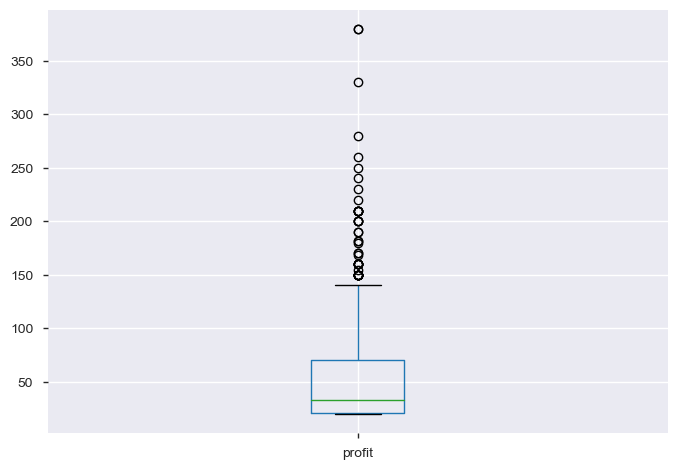

In [25]:
#outliers check
megaline_data_mac['profit'].plot.box()

#check what part of the data we will lose if picking values below 150 profit in order to get rid of outliers
print(len(megaline_data_mac.loc[megaline_data_mac['profit']>150]))
print(len(megaline_data_mac['profit']))

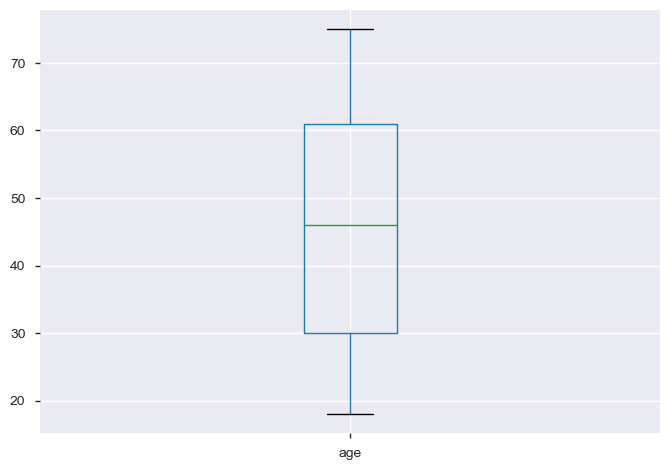

In [26]:
#outliers check
megaline_data_mac['age'].plot.box()

#result - no outliers

43
2303


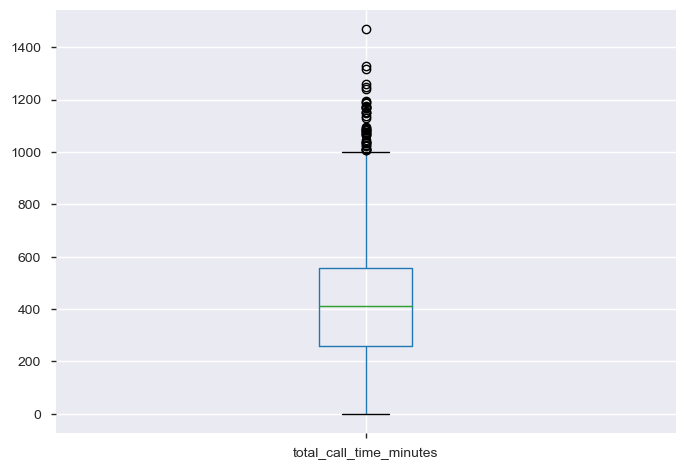

In [27]:
#outliers check
megaline_data_mac['total_call_time_minutes'].plot.box()

#check what part of the data we will lose if picking values below 1000 profit in order to get rid of outliers
print(len(megaline_data_mac.loc[megaline_data_mac['total_call_time_minutes']>1000]))
print(len(megaline_data_mac['total_call_time_minutes']))

47
2303


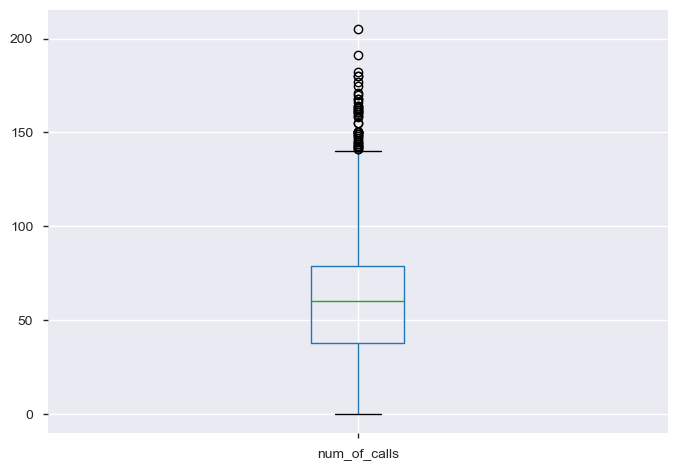

In [28]:
#outliers check
megaline_data_mac['num_of_calls'].plot.box()

#check what part of the data we will lose if picking values below 140 profit in order to get rid of outliers
print(len(megaline_data_mac.loc[megaline_data_mac['num_of_calls']>140]))
print(len(megaline_data_mac['num_of_calls']))

64
2303


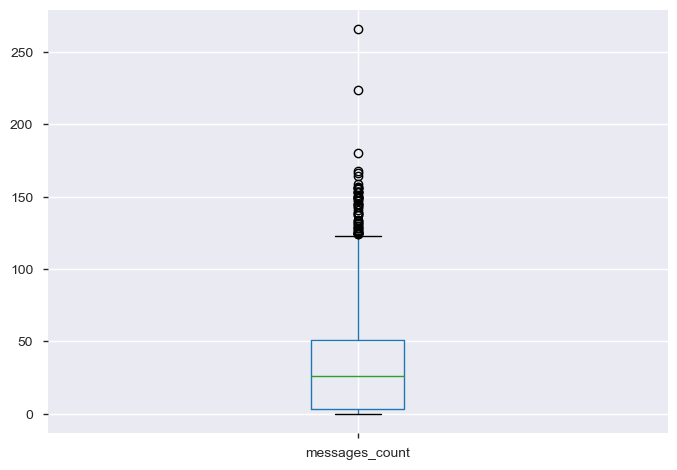

In [29]:
#outliers check
megaline_data_mac['messages_count'].plot.box()

#check what part of the data we will lose if picking values below 120 profit in order to get rid of outliers
print(len(megaline_data_mac.loc[megaline_data_mac['messages_count']>120]))
print(len(megaline_data_mac['messages_count']))

49
2303


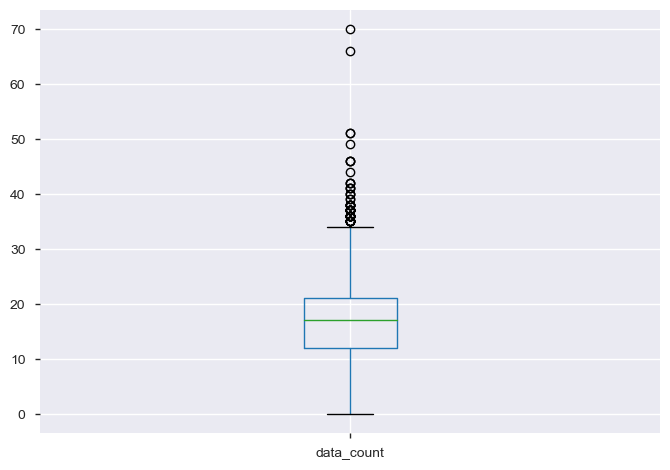

In [30]:
#outliers check
megaline_data_mac['data_count'].plot.box()

#check what part of the data we will lose if picking values below 35 profit in order to get rid of outliers
print(len(megaline_data_mac.loc[megaline_data_mac['data_count']>35]))
print(len(megaline_data_mac['data_count']))

In [31]:
#cremoving outliers and making sure i did not lose more than 10% of the data

print(len(megaline_data_mac))

megaline_data_mac = megaline_data_mac.loc[(megaline_data_mac['profit'] <= 150) &
                                          (megaline_data_mac['total_call_time_minutes'] <= 1000) &
                                         (megaline_data_mac['num_of_calls'] <= 140) &
                                         (megaline_data_mac['messages_count'] <= 120) &
                                         (megaline_data_mac['data_count'] <= 35)]

print(len(megaline_data_mac))

2303
2121


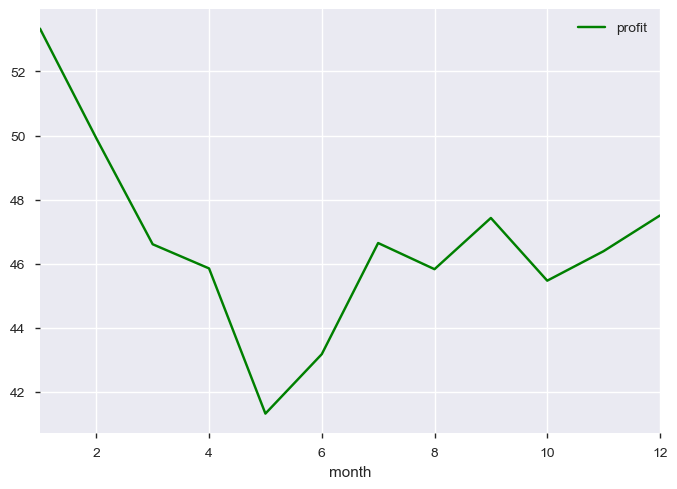

In [32]:
#becuase we removed the outliers we can use the mean and not median
megaline_data_mac_month_profit = megaline_data_mac.pivot_table(index='month',values='profit',aggfunc='mean')

megaline_data_mac_month_profit = megaline_data_mac_month_profit.reset_index()

#priting out a proft per month graph

megaline_data_mac_month_profit.plot(x='month',y='profit', style='-', color='g')

### Conclusion

There is a sharp fall from January to May and then a rise up again.

Altough we can claim that in month January to February did not had enough data to set a conclusive argument,
in April and May we had enough and still there is a sharp fall of 10% which does not recover until July.
We need to check with the sales department what happened between April any May.

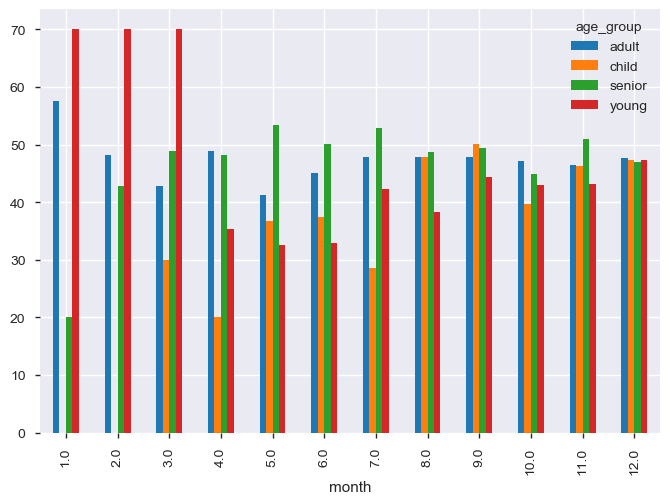

In [33]:
#becuase we removed the outliers we can use the mean and not median
megaline_data_mac_age_profit = megaline_data_mac.pivot_table(index=['month'],columns='age_group',values='profit',aggfunc='mean')

#priting out a proft per month graph
megaline_data_mac_age_profit.plot.bar()

## conclusion
##### side note - between months 1-2 we only had few data points so we can see these graphs as outliers and not representative for the true data (same for month 3 with the young group)

We can see that there is no big difference between the profit from each segment.
with that said we can see an exclusion between month 5-7. in which the senior group is more profitable and the child group is less profitable.
Maybe we can create a special sale for senior in these month which will increase our profit

we can see that there is an increase in profit in august and september in the child group. 

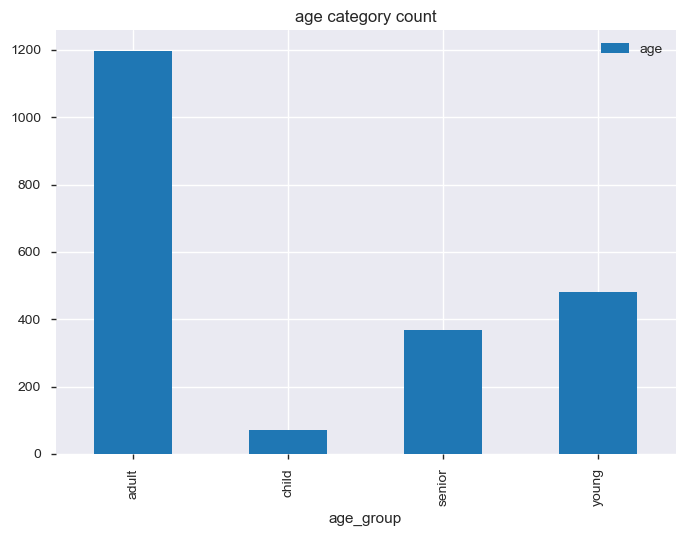

In [34]:
#pivot table that count clients by group
megaline_data_mac_client_count = megaline_data_mac.pivot_table(index=['age_group'],values='age',aggfunc='count')

#priting out number of clients per group
megaline_data_mac_client_count.plot(kind='bar', title='age category count')

### Conclusion

we can see that most of our clients are adults.

the order is 

1. adults
2. young
3. senior
4. child

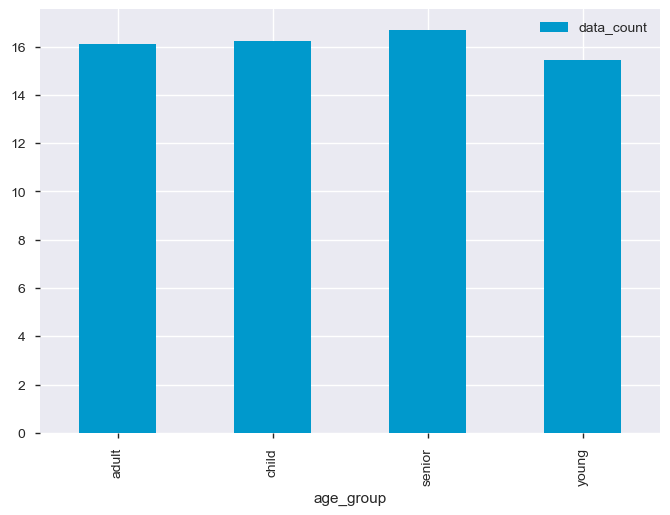

In [35]:
#becuase we removed the outliers we can use the mean and not median
megaline_data_mac_data_count = megaline_data_mac.pivot_table(index=['age_group'],values='data_count',aggfunc='mean')

#priting out a data usage per group
megaline_data_mac_data_count.plot(kind='bar', color='#0099cc')

### Conclusion

There is no significant change between the age group data usage

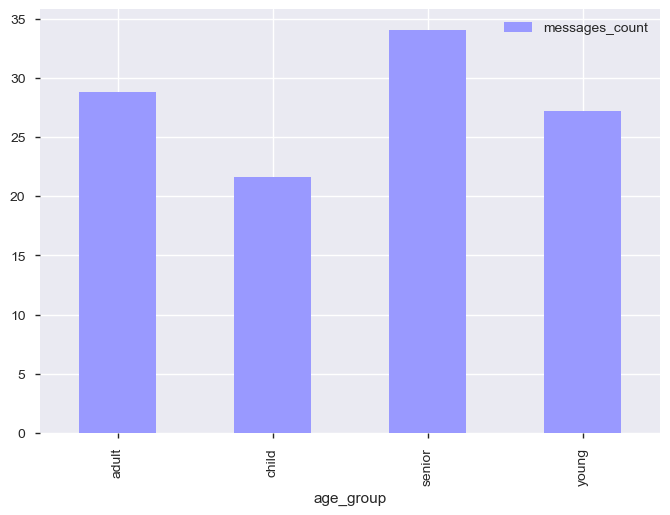

In [36]:
#becuase we removed the outliers we can use the mean and not median
megaline_data_mac_messages_count = megaline_data_mac.pivot_table(index=['age_group'],values='messages_count',aggfunc='mean')

#priting out a messages usage per group
megaline_data_mac_messages_count.plot(kind='bar', color='#9999ff')

### Conclusion

Altought diffrences are not big, the group that uses the most texts is the seniors

The order of usage is:

1. senior
2. adult
3. young
4. child

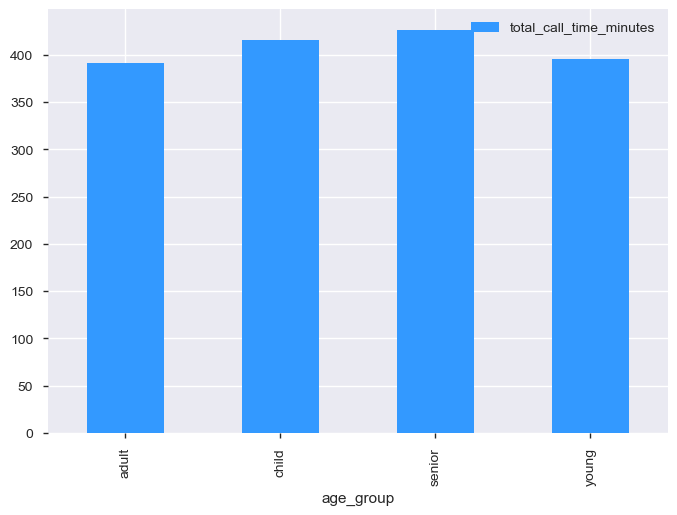

In [37]:
#becuase we removed the outliers we can use the mean and not median
megaline_data_mac_call_count = megaline_data_mac.pivot_table(index=['age_group'],values='total_call_time_minutes',aggfunc='mean')

#priting out a calls minuets per group
megaline_data_mac_call_count.plot(kind='bar', color='#3399ff')

### Conclusion

Altought diffrences are not big, the group that uses the most call time is the seniors

The order of usage is:

1. senior
2. child
3. young
4. adult

### Plan comparison

In [38]:
#Splitting the data by plan

megaline_data_surf = megaline_data_mac.query('plan == "surf"')

megaline_data_ulti = megaline_data_mac.query('plan == "ultimate"')

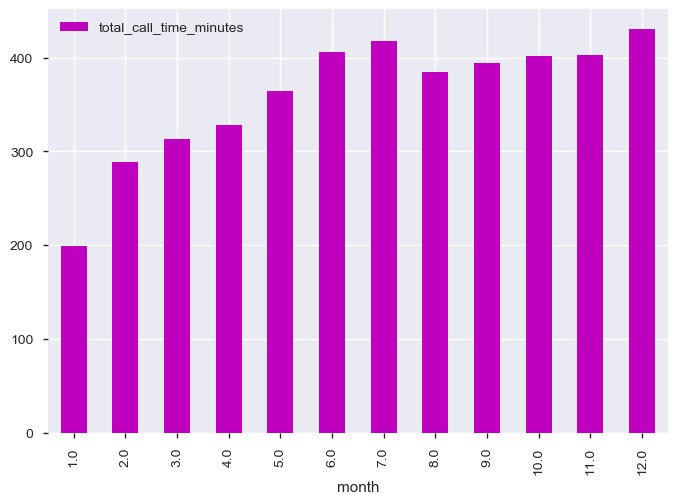

In [39]:
#printing out average call time per month on the surf plan
#becuase we removed the outliers we can use the mean and not median
megaline_data_surf.pivot_table(index=['month'],values='total_call_time_minutes',aggfunc='mean').plot(kind='bar', color='m')

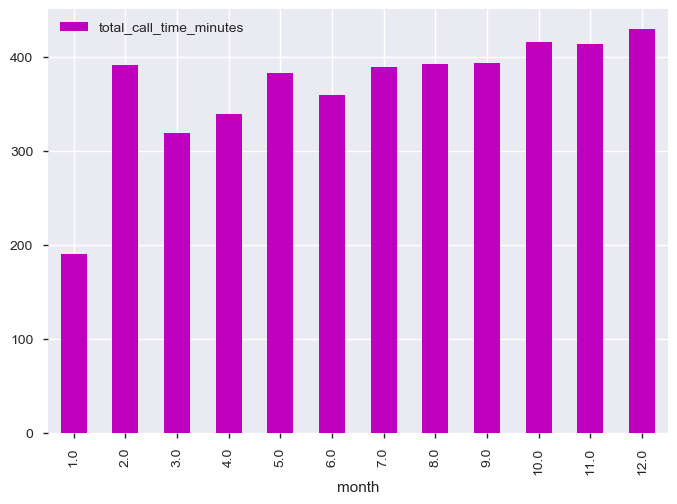

In [40]:
#printing out average call time per month on the ultimate plan
#becuase we removed the outliers we can use the mean and not median
megaline_data_ulti.pivot_table(index=['month'],values='total_call_time_minutes',aggfunc='mean').plot(kind='bar', color='m')

### Conclusion

we can see that in there is no big difference in call time minutes time between surf and ultimate plan

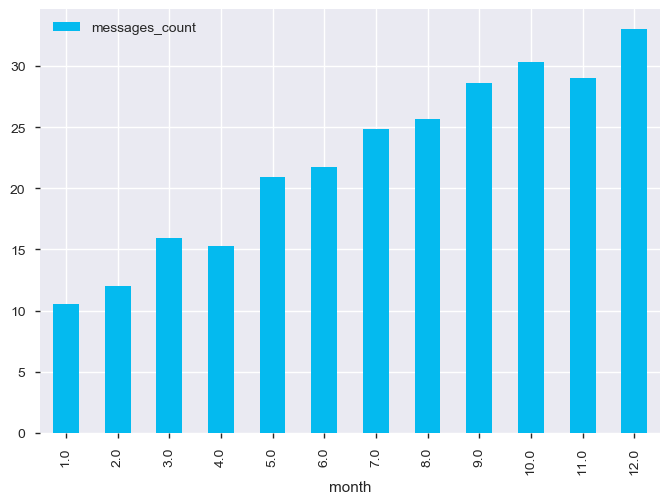

In [41]:
#printing out average messages count per month on the surf plan
#becuase we removed the outliers we can use the mean and not median
megaline_data_surf.pivot_table(index=['month'],values='messages_count',aggfunc='mean').plot(kind='bar', color='#04baef')

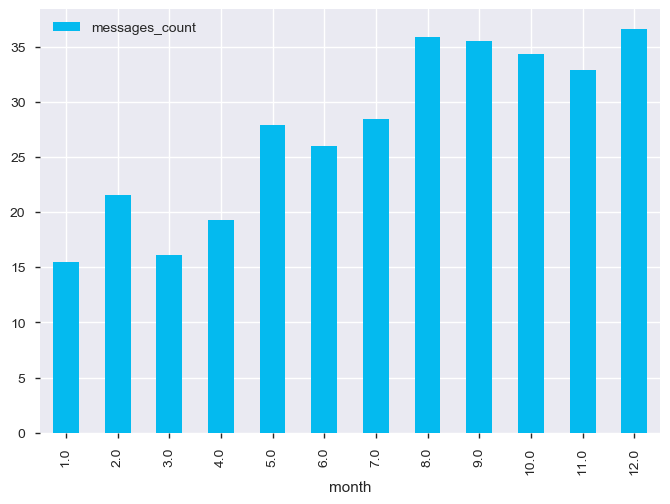

In [42]:
#printing out average messages count per month on the ultimate plan
#becuase we removed the outliers we can use the mean and not median
megaline_data_ulti.pivot_table(index=['month'],values='messages_count',aggfunc='mean').plot(kind='bar', color='#04baef')

### Conclusion

we can see that there is an increase throught the year in the number of texts sent,
ultimate plan members send a bit more than surf plan. Altough they both do not go beyond their plan free limit

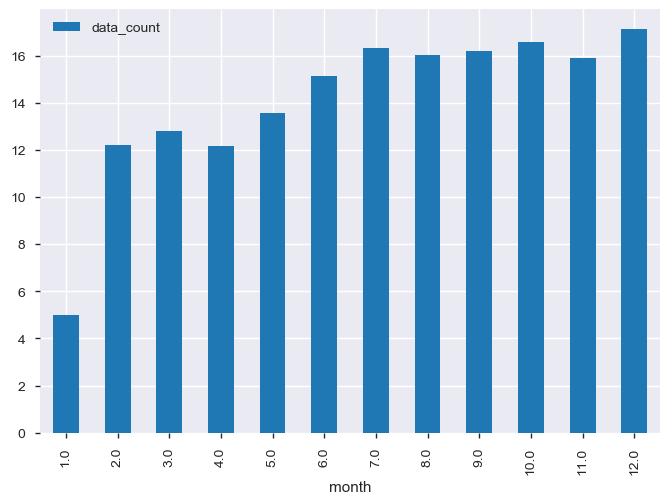

In [43]:
#printing out data usage per month on the surf plan
#becuase we removed the outliers we can use the mean and not median
megaline_data_surf.pivot_table(index=['month'],values='data_count',aggfunc='mean').plot(kind='bar')

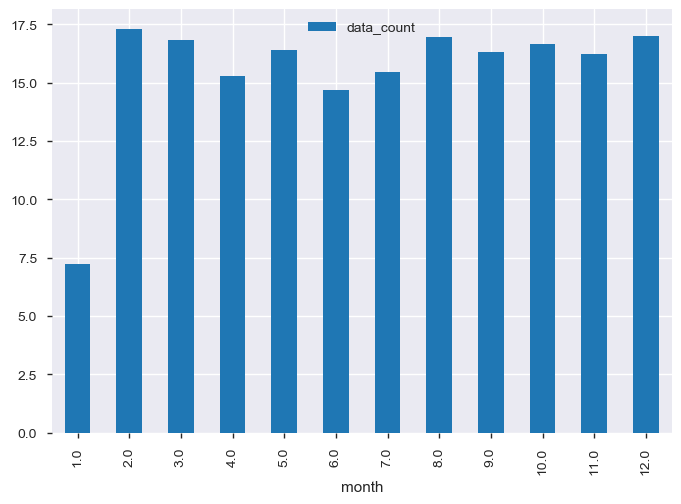

In [44]:
#printing out average call time per month on the ultimate plan
#becuase we removed the outliers we can use the mean and not median
megaline_data_ulti.pivot_table(index=['month'],values='data_count',aggfunc='mean').plot(kind='bar')

### Conclusion

The ultimate plan users are using more data usage than the surf plan.

Between July and December the Surf plan members goes beyond their free data usage limit and spend around 16GB.

### Plans comparison part General conclusion
Considering the fact that the surf plan users do not go beyond their free text and calls limit but do use an extra data usage in month July-December i suggest opening up a new plan "Surf Plus" which would offer 1000 minutes, 100 text messages and 16GB. The cost of the plan will be 35$

(the increase of the call minutes and texts won't hurt our infrustrcture as users do not use their full package anyway but it will make the users feel like they have a lot of calls and texts. 
Most of the users only uses 1 extra GB of data which profit us 10 dollars but if we increase the number of calls and text as well we can charge 15 dollars more than the Surf plan and profit an extra 5 dollars without changing the infrustrcture load).

In [45]:
#Big spender
#Top 10 clients that the managment may want to send a special thank you note or anything else thtat may keep them in our company
megaline_data_mac.sort_values('profit',ascending=False).head(10)

,plan,time_used,city,age,month,total_call_time_minutes,num_of_calls,messages_count,data_count,profit,age_group,call_group,messages_group,data_group
user_id,,,,,,,,,,,,,,
1265,surf,607 days,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",29,12.0,206.0,40.0,0.0,28.0,150.0,young,small,small,alot
1206,surf,744 days,"Providence-Warwick, RI-MA MSA",21,12.0,345.0,47.0,33.0,28.0,150.0,young,medium,small,alot
1332,surf,863 days,"Atlanta-Sandy Springs-Roswell, GA MSA",37,10.0,264.0,40.0,6.0,28.0,150.0,adult,medium,small,alot
1004,surf,791 days,"Seattle-Tacoma-Bellevue, WA MSA",40,8.0,342.0,49.0,25.0,28.0,150.0,adult,medium,small,alot
1325,surf,757 days,"Dallas-Fort Worth-Arlington, TX MSA",43,12.0,416.0,67.0,0.0,28.0,150.0,adult,medium,small,alot
1312,surf,908 days,"Fresno, CA MSA",42,4.0,285.0,49.0,38.0,28.0,150.0,adult,medium,small,alot
1017,surf,696 days,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",61,10.0,394.0,68.0,35.0,28.0,150.0,adult,medium,small,alot
1166,surf,807 days,"Baltimore-Columbia-Towson, MD MSA",26,11.0,182.0,30.0,0.0,28.0,150.0,young,small,small,alot
1127,surf,760 days,"New York-Newark-Jersey City, NY-NJ-PA MSA",28,11.0,222.0,33.0,12.0,28.0,150.0,young,small,small,alot


### Clients that should be given extra attention (Top 10 spenders)

user id:

1. 1265
2. 1206
3. 1332
4. 1004
5. 1325
6. 1312
7. 1017
8. 1166
9. 1127
10. 1007

In [75]:
#Data dispersion and standard deviation

print("Data variance:\n","\n",np.var(megaline_data_mac))
print()
print("Data standard deviation:\n","\n",np.std(megaline_data_mac))

Data variance:
 
 age                          281.068833
month                          6.298001
total_call_time_minutes    42040.134012
num_of_calls                 839.188106
messages_count               782.595403
data_count                    44.482690
profit                       785.026329
dtype: float64

Data standard deviation:
 
 age                         16.765108
month                        2.509582
total_call_time_minutes    205.036909
num_of_calls                28.968744
messages_count              27.974907
data_count                   6.669534
profit                      28.018321
dtype: float64


0.045631167665921527


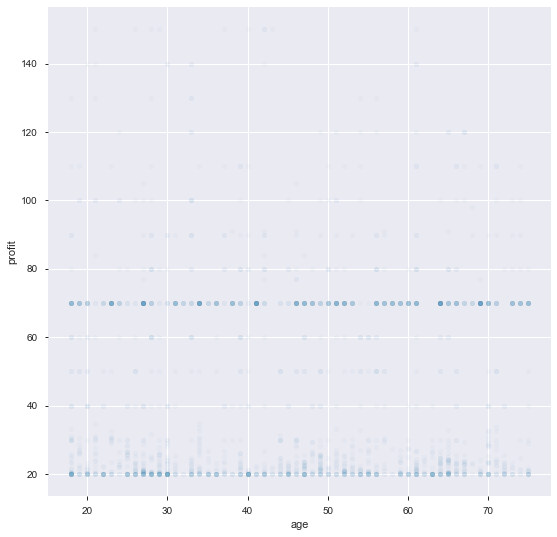

In [78]:
#Corralation check

#age and profit

print(megaline_data_mac['age'].corr(megaline_data_mac['profit']))

megaline_data_mac.plot(x='age',y='profit',kind='scatter',alpha=0.03, figsize=(9,9))

-0.03913074466052016


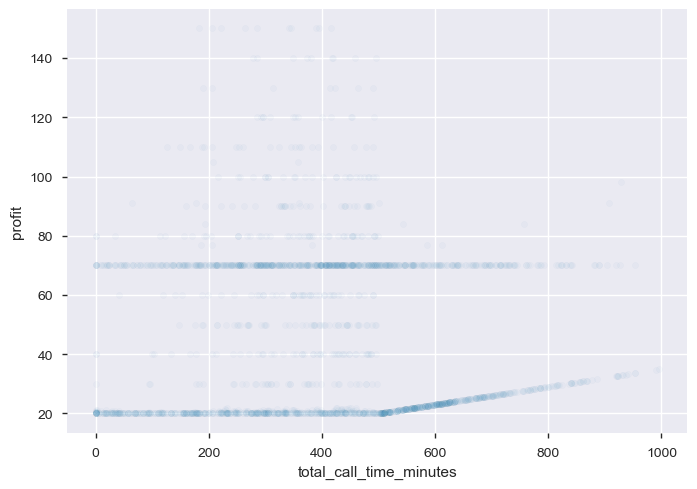

In [47]:
#Corralation check

#profit and call time

print(megaline_data_mac['total_call_time_minutes'].corr(megaline_data_mac['profit']))

megaline_data_mac.plot(x='total_call_time_minutes',y='profit',kind='scatter',alpha=0.03)

-0.04413475425465165


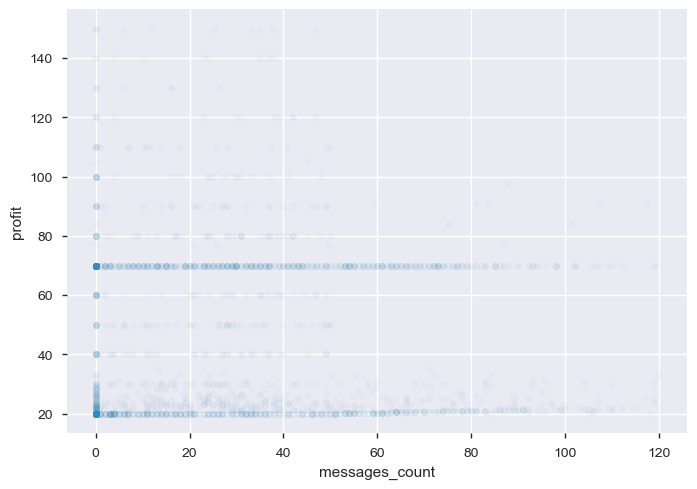

In [48]:
#Corralation check

#profit and texts

print(megaline_data_mac['messages_count'].corr(megaline_data_mac['profit']))

megaline_data_mac.plot(x='messages_count',y='profit',kind='scatter',alpha=0.03)

0.3507727963912814


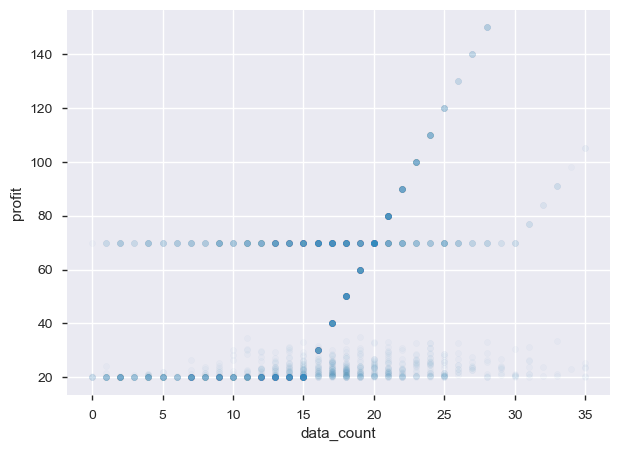

In [49]:
#Corralation check

#profit and data usage

print(megaline_data_mac['data_count'].corr(megaline_data_mac['profit']))

megaline_data_mac.plot(x='data_count',y='profit',kind='scatter',alpha=0.03, figsize=(7,5))

### Conclusion

There is no corralation between profit and call time in minutes/messages count/age

And there is a small corralation between profit and data usage

## Test Hypothesis

In [50]:
megaline_data_surf_sam = megaline_data_surf['profit'].sample(50)

megaline_data_ulti_sam = megaline_data_ulti['profit'].sample(50)

surf_var = np.var(megaline_data_surf_sam)

ulti_var = np.var(megaline_data_ulti_sam)

alpha = 0.05

#H0 = The average profit from the ultimate and surf plans is the same

#H1 = The average profit from the ultimate and surf plans is the different

In [51]:
#Testing if var is equal

surf_var - ulti_var

920.047796

In [52]:
results = st.ttest_ind(megaline_data_surf_sam,megaline_data_ulti_sam,equal_var=False)

print('Surf profit mean:', megaline_data_surf_sam.mean())
print('Ultimate profit mean:', megaline_data_ulti_sam.mean())

print()

print('Surf standard deviation:',np.sqrt(surf_var))
print('Ultimate standard deviation:',np.sqrt(ulti_var))

print()

if results.pvalue < alpha:
    print('We Reject the Null hypothesis')
else:
    print('We do not reject the Null hypothesis')

Surf profit mean: 37.108
Ultimate profit mean: 70.0

Surf standard deviation: 30.33228965970093
Ultimate standard deviation: 0.0

We Reject the Null hypothesis


### Conclusion

There is a difference in the plan's average user profit

In [53]:
#checking the cities

megaline_data_mac['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA           360
Los Angeles-Long Beach-Anaheim, CA MSA              130
Chicago-Naperville-Elgin, IL-IN-WI MSA               91
Dallas-Fort Worth-Arlington, TX MSA                  81
Boston-Cambridge-Newton, MA-NH MSA                   70
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA      70
Miami-Fort Lauderdale-West Palm Beach, FL MSA        56
Washington-Arlington-Alexandria, DC-VA-MD-WV MSA     52
Seattle-Tacoma-Bellevue, WA MSA                      51
San Francisco-Oakland-Berkeley, CA MSA               48
Riverside-San Bernardino-Ontario, CA MSA             44
Charlotte-Concord-Gastonia, NC-SC MSA                44
Atlanta-Sandy Springs-Roswell, GA MSA                44
Portland-Vancouver-Hillsboro, OR-WA MSA              42
Minneapolis-St. Paul-Bloomington, MN-WI MSA          41
Phoenix-Mesa-Chandler, AZ MSA                        38
Cincinnati, OH-KY-IN MSA                             36
Denver-Aurora-Lakewood, CO MSA                  

In [54]:
#Splitting our dataframe into tagret area and everything else
target_area = 'NY-NJ-PA MSA'

megaline_data_NY_NJ = megaline_data_mac.loc[megaline_data_mac['city'].str.contains(target_area)]

megaline_data_other_area = megaline_data_mac.loc[~megaline_data_mac['city'].str.contains(target_area)]

#Getting Samples 
megaline_data_NY_NJ_sam = megaline_data_NY_NJ['profit'].sample(50)

megaline_data_other_area_sam = megaline_data_other_area['profit'].sample(50)

In [55]:
NY_NJ_var = np.var(megaline_data_NY_NJ_sam)

other_var = np.var(megaline_data_other_area_sam)

alpha_area = 0.05

#H0 = The average profit from NY-NJ area is the same as everyone else

#H1 = The average profit from NY-NJ area is different

In [56]:
#Testing if var is equal

NY_NJ_var - other_var

-446.0884241200006

In [57]:
results_area = st.ttest_ind(megaline_data_NY_NJ_sam,megaline_data_other_area_sam,equal_var=False)

print('NY-NJ profit mean:', megaline_data_NY_NJ_sam.mean())
print('Other area profit mean:', megaline_data_other_area_sam.mean())

print()

print('NY-NJ standard deviation:',np.sqrt(NY_NJ_var))
print('Other area standard deviation:',np.sqrt(other_var))

print()

if results_area.pvalue < alpha_area:
    print('We Reject the Null hypothesis')
else:
    print('We do not reject the Null hypothesis')

NY-NJ profit mean: 36.7514
Other area profit mean: 46.742799999999995

NY-NJ standard deviation: 22.83951864729202
Other area standard deviation: 31.10839173213557

We do not reject the Null hypothesis


### Conclusion

There is no difference in profit between NY-NJ area and the other areas

## Overall Conclusion



1.  There is a sharp fall in sales from January to May and then a rise up again.
    Altough we can claim that in month January to February did not had enough data to set a conclusive argument,
    in April and May we had enough and still there is a sharp fall of 10% which does not recover until July.
    We need to check with the sales department what happened between April any May.


2. There is no big difference between the profit from each segment.
   with that said we can see an exclusion between month 5-7. in which the senior group is more profitable and the child group      is less profitable.
   Maybe we can create a special sale for senior in these month which will increase our profit.

   we can see that there is an increase in profit in august and september in the child group (might be due to the end of summer    and stying at home more).

   side note - between months 1-2 we only had few data points so we can see these graphs as outliers and not representative        for the true data (same for month 3 with the young group)


    *(All order are presented is descending order)

3.  Most of our clients are adults.

    The order is:

    1. adults
    2. young
    3. senior
    4. child


4.  There is no significant change between the ages group data usage

    Altought diffrences are not big, the group that uses the most texts is the seniors

    The order of text number is:

    1. senior
    2. adult
    3. young
    4. child



5.  Altought diffrences are not big, the group that uses the most call time is the seniors

    The order of call time is:

    1. senior
    2. child
    3. young
    4. adult


6. Clients that should be given extra attention (Top 10 spenders)

    user id:

    1. 1265
    2. 1206
    3. 1332
    4. 1004
    5. 1325
    6. 1312
    7. 1017
    8. 1166
    9. 1127
    10. 1007


7. There are no big differences in call time minutes between surf and ultimate plan


8. There is an increase throught the year in the number of texts sent,
   ultimate plan members send a bit more than surf plan. Altough they both do not go beyond their plan free limit


9. The ultimate plan users are using more data usage than the surf plan.

   Between July and December the Surf plan members goes beyond their free data usage limit and spend around 16GB.


10. Considering the fact that the surf plan users do not go beyond their free text and calls limit but do use an extra data        usage in month July-December i suggest opening up a new plan "Surf Plus" which would offer 1000 minutes, 100 text messages      and 16GB. The cost of the plan will be 35$
   (the increase of the call minutes and texts won't hurt our infrustrcture as users do not use their full package anyway but      it will make the users feel like they have a lot of calls and texts. 
   Most of the users only uses 1 extra GB of data which profit us 10 dollars but if we increase the number of calls and text       as well we can charge 15 dollars more than the Surf plan and profit an extra 5 dollars per client without changing the infrustrcture       load).


11. There is no corralation between profit and call time in minutes/messages count/age

    And there is a small corralation between profit and data usage


12. There is a difference in the plan's average user profit


13. There is no difference in profit between NY-NJ area and the other areas